# Linear Classification Lab

## 准备工作
### 环境准备
请确保完成以下依赖包的安装，并且通过下面代码来导入与验证。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

### 数据集准备

我们将使用以下二维数据集来进行线性分类器的拟合。

请执行下面的代码以加载数据集并对其进行可视化。

In [2]:
from data_generator import gen_2D_dataset

x_train, y_train = gen_2D_dataset(100)
x_test, y_test = gen_2D_dataset(10) 

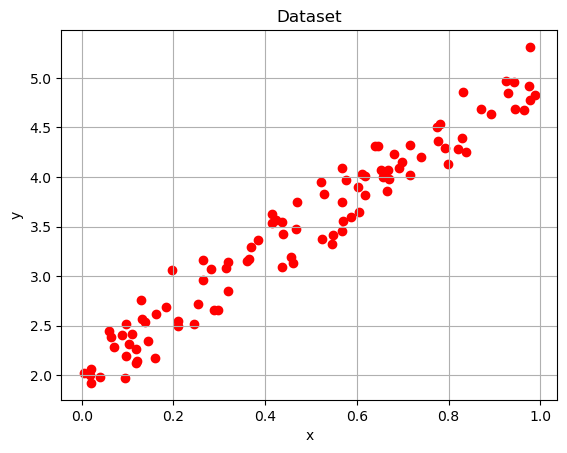

[0.20747008 0.42468547 0.37416998 0.46357542 0.27762871 0.58678435
 0.86385561 0.11753186 0.51737911 0.13206811]
[2.47449763 3.58265933 2.86393856 3.44413645 2.82502956 3.52673434
 4.69622215 2.3182863  3.70649543 2.56090515]


In [13]:
from vis_util import visualize_2D_dataset, visualize_2D_border

visualize_2D_dataset(x_train, y_train)
print(x_test)
print(y_test)

## 线性回归 (10 pts)

在这一部分，你需要通过最小二乘法的闭式解来解决线性回归问题，并计算以下损失函数的值。

$$ L(w,b) = \frac{1}{n} \sum_{i\in[n]} (y_i - (w^Tx_i + b))^2 $$

你可能会用到的函数有：`numpy.linalg.inv()`、`numpy.dot()`、`numpy.transpose()`、`numpy.ones()`、`numpy.concatenate()`、`numpy.sum()` 等。

In [18]:
# In this section, please implement the linear regression using the closed form solution 
    
# TODO: firstly, add a column of 1s to the x_train as the bias term
ones_array = np.ones_like(x_train)

# Concatenating the original array and the ones array
x_modified = np.concatenate(([x_train], [ones_array]))

# TODO: secondly, use the closed form solution to calculate the best theta
theta = np.linalg.inv(x_modified.dot(x_modified.T)).dot(x_modified).dot(y_train.T)


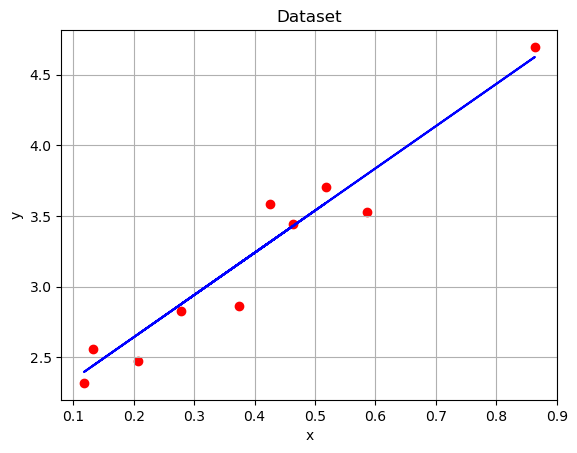

In [19]:
# In this section, please visualize the linear regression solution in 2D using the visualize_2D_border function

# TODO: firstly, compute the y_pred using the best theta
x_test_modified = np.concatenate(([x_test], [np.ones_like(x_test)]))
y_pred = theta.dot(x_test_modified)

# TODO: Secondly, visualize the linear regression solution in 2D using the visualize_2D_border function
visualize_2D_border(x_test, y_test, y_pred)


In [20]:
# Define the loss function
def compute_loss(X, y, theta):
    ''' 
    Compute the loss function for linear regression

    Args:
        X: the input data
        y: the label
        theta: the weights
    Returns:
        the loss value (a scalar)
    '''
    # TODO: firstly, compute the length of the dataset
    n = X.shape[0]
    
    # TODO: secondly, compute the y_pred using the input data and the weights
    X_modified = np.concatenate(([X], [np.ones_like(X)]))
    y_pred = theta.dot(X_modified)

    # TODO: thirdly, compute the loss using the y_pred and the label
    return np.sum((y - y_pred) ** 2) / n
    
    pass 


In [22]:
# In this section, compute the loss on the training set and the test set

# TODO: the loss on the training set (invoke the compute_loss function)
train_loss = compute_loss(x_train, y_train, theta)

# TODO: the loss on the testing test
test_loss = compute_loss(x_test, y_test, theta)

# TODO: print the training loss and the test loss
print(f'Training loss: {train_loss}')
print(f'Test loss: {test_loss}')

Training loss: 0.03969754594898593
Test loss: 0.03129210600605726
